In [2]:
import pandas as pd
import seaborn as sb
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [23]:
ca_data = pd.read_csv('/home/codonnell/ca_data.csv')
tx_data = pd.read_csv('/home/codonnell/tx_data.csv')

In [4]:
tx_data.head()

,Unnamed: 0,state,zip_code,num_tutors,av_rate
0,0,alabama,35004,1,$50.00
1,1,alabama,35005,1,$40.00
2,2,alabama,35006,1,$30.00
3,3,alabama,35007,4,$51.25
4,4,alabama,35010,1,$40.00


In [5]:
def dol_to_float(dol):
    return float(dol.strip('$'))

In [24]:
ca_data['av_rate'] = ca_data['av_rate'].apply(dol_to_float)

In [25]:
ten = tx_data[tx_data['state']=='tennessee']
ten['av_rate']=ten['num_tutors']
ten['av_rate'] = ten['av_rate'].apply(dol_to_float)
ten.head()

<ipython-input-25-81c8649ce2e6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ten['av_rate']=ten['num_tutors']
<ipython-input-25-81c8649ce2e6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ten['av_rate'] = ten['av_rate'].apply(dol_to_float)


,Unnamed: 0,state,zip_code,num_tutors,av_rate
1274,0,tennessee,37010,$50.00,50.0
1275,1,tennessee,37013,$40.80,40.8
1276,2,tennessee,37020,$35.00,35.0
1277,3,tennessee,37022,$60.00,60.0
1278,4,tennessee,37024,$40.00,40.0


In [26]:
tx_data=tx_data[tx_data['state']!='tennessee']
tx_data['av_rate'] = tx_data['av_rate'].apply(dol_to_float)
tx_data_s=pd.concat([tx_data,ten])

In [27]:
#tx_data['av_rate'] = tx_data['av_rate'].apply(dol_to_float)
#tx_data_s['av_rate'] = tx_data_s['av_rate'].apply(dol_to_float)
tx_data_s.head()

,Unnamed: 0,state,zip_code,num_tutors,av_rate
0,0,alabama,35004,1,50.00
1,1,alabama,35005,1,40.00
2,2,alabama,35006,1,30.00
3,3,alabama,35007,4,51.25
4,4,alabama,35010,1,40.00


In [28]:
ca_grouped = ca_data.groupby('state')['av_rate'].mean().reset_index()
tx_grouped = tx_data_s.groupby('state')['av_rate'].mean().reset_index()
tx_grouped

,state,av_rate
0,alabama,41.056027
1,arkansas,40.049508
2,colorado,42.667597
3,georgia,41.633810
4,maryland,45.744982
5,tennessee,41.717826
6,texas,43.286241
7,virginia,42.965807


In [29]:
all_states_grouped = pd.concat([ca_grouped,tx_grouped])
all_states_grouped

,state,av_rate
0,DC,50.555556
1,arizona,42.133891
2,california,45.753065
3,connecticut,50.580357
4,delaware,43.666667
5,idaho,39.396552
6,illinois,42.811861
7,indiana,41.057692
8,iowa,39.910714
9,kentucky,41.521739


In [30]:
states_shp = gpd.read_file("/home/codonnell/tl_2017_us_state/tl_2017_us_state.shp")

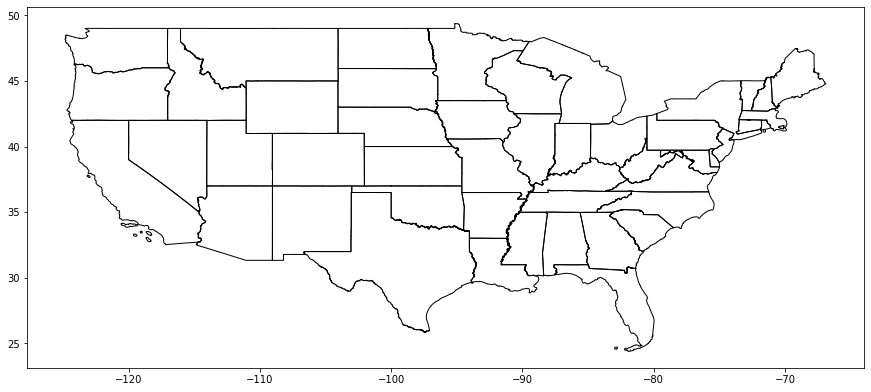

In [31]:
rcParams['figure.figsize'] = 15,15
non_contig = ['02', '15', '60', '66', '69', '72', '78']
states_dict = {'01':'alabama', '04':'arizona', '05':'arkansas', '06':'california', '08':'colorado', '09':'connecticut',
                '10':'delaware','11': 'DC', '12':'florida', '13':'georgia', '16':'idaho', '17':'illinois', '18':'indiana',
                '19':'iowa', '20':'kansas', '21':'kentucky', '22':'louisiana', '23':'maine', '24':'maryland',
                '25':'massachusetts', '26':'michigan', '27':'minnesota', '28':'mississippi', '29':'missouri', '30':'montana',
                '31':'nebraska', '32':'nevada', '33':'new hampshire', '34':'new jersey', '35':'new mexico', '36':'new york',
                '37':'north carolina', '38':'north dakota', '39':'ohio', '40':'oklahoma', '41':'oregon', '42':'pennsylvania',
                '44':'rhode island', '45':'south carolina', '46':'south dakota', '47':'tennessee', '48':'texas', '49':'utah',
                '50':'vermont', '51':'virginia', '53':'washington', '54':'west virginia', '55':'wisconsin', '56':'wyoming'}
contig_states = states_shp[~states_shp['STATEFP'].isin(non_contig)]
ax = contig_states.plot(figsize=(15,15), color='none', edgecolor='black', zorder=3)

In [32]:
contig_states['NAME'] =contig_states['NAME'].apply(str.lower)

<ipython-input-32-4837ce273203>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contig_states['NAME'] =contig_states['NAME'].apply(str.lower)


In [33]:
joined = pd.merge(contig_states, all_states_grouped, left_on = 'NAME', right_on = 'state')
joined.head()

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,state,av_rate
0,3,5,54,01779805,54,WV,west virginia,00,G4000,A,62265662566,489840834,+38.6472854,-080.6183274,"POLYGON ((-81.74725 39.09538, -81.74635 39.096...",west virginia,40.289855
1,2,3,17,01779784,17,IL,illinois,00,G4000,A,143784114293,6211277447,+40.1028754,-089.1526108,"POLYGON ((-91.18529 40.63780, -91.17510 40.643...",illinois,42.811861
2,2,4,27,00662849,27,MN,minnesota,00,G4000,A,206229176104,18944967530,+46.3158148,-094.1996628,"POLYGON ((-96.78438 46.63050, -96.78434 46.630...",minnesota,44.306220
3,3,5,24,01714934,24,MD,maryland,00,G4000,A,25150696145,6980371026,+38.9466584,-076.6744939,"POLYGON ((-77.45881 39.22027, -77.45866 39.220...",maryland,45.744982
4,1,1,44,01219835,44,RI,rhode island,00,G4000,A,2677997539,1323452846,+41.5974187,-071.5272723,"MULTIPOLYGON (((-71.67881 41.15891, -71.67626 ...",rhode island,46.269841


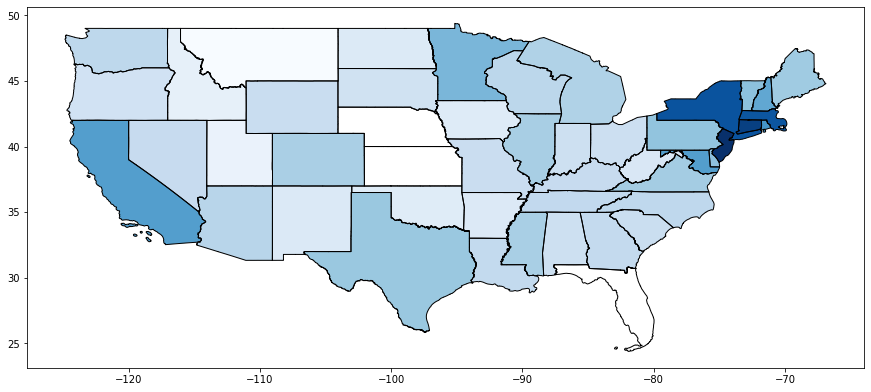

In [35]:
ax = contig_states.plot(figsize=(15,15), color='none', edgecolor='black', zorder=3)
joined.plot(column='av_rate',cmap='Blues', ax=ax)
plt.savefig('/home/codonnell/tutors/map.png')